In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.metrics import r2_score , mean_absolute_error,  mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm                 
from sklearn.linear_model import LogisticRegression                              
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [2]:
import os
os.getcwd()

'C:\\Users\\ASUS\\OneDrive\\Desktop\\Data science files'


Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

In [3]:

df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.loc[(df.smoker=='no') & (df.bmi<=25)&(df.charges>20000)].index

Int64Index([3, 62, 140, 219, 468, 661, 688, 1008, 1027, 1142, 1328], dtype='int64')

<IPython.core.display.Javascript object>


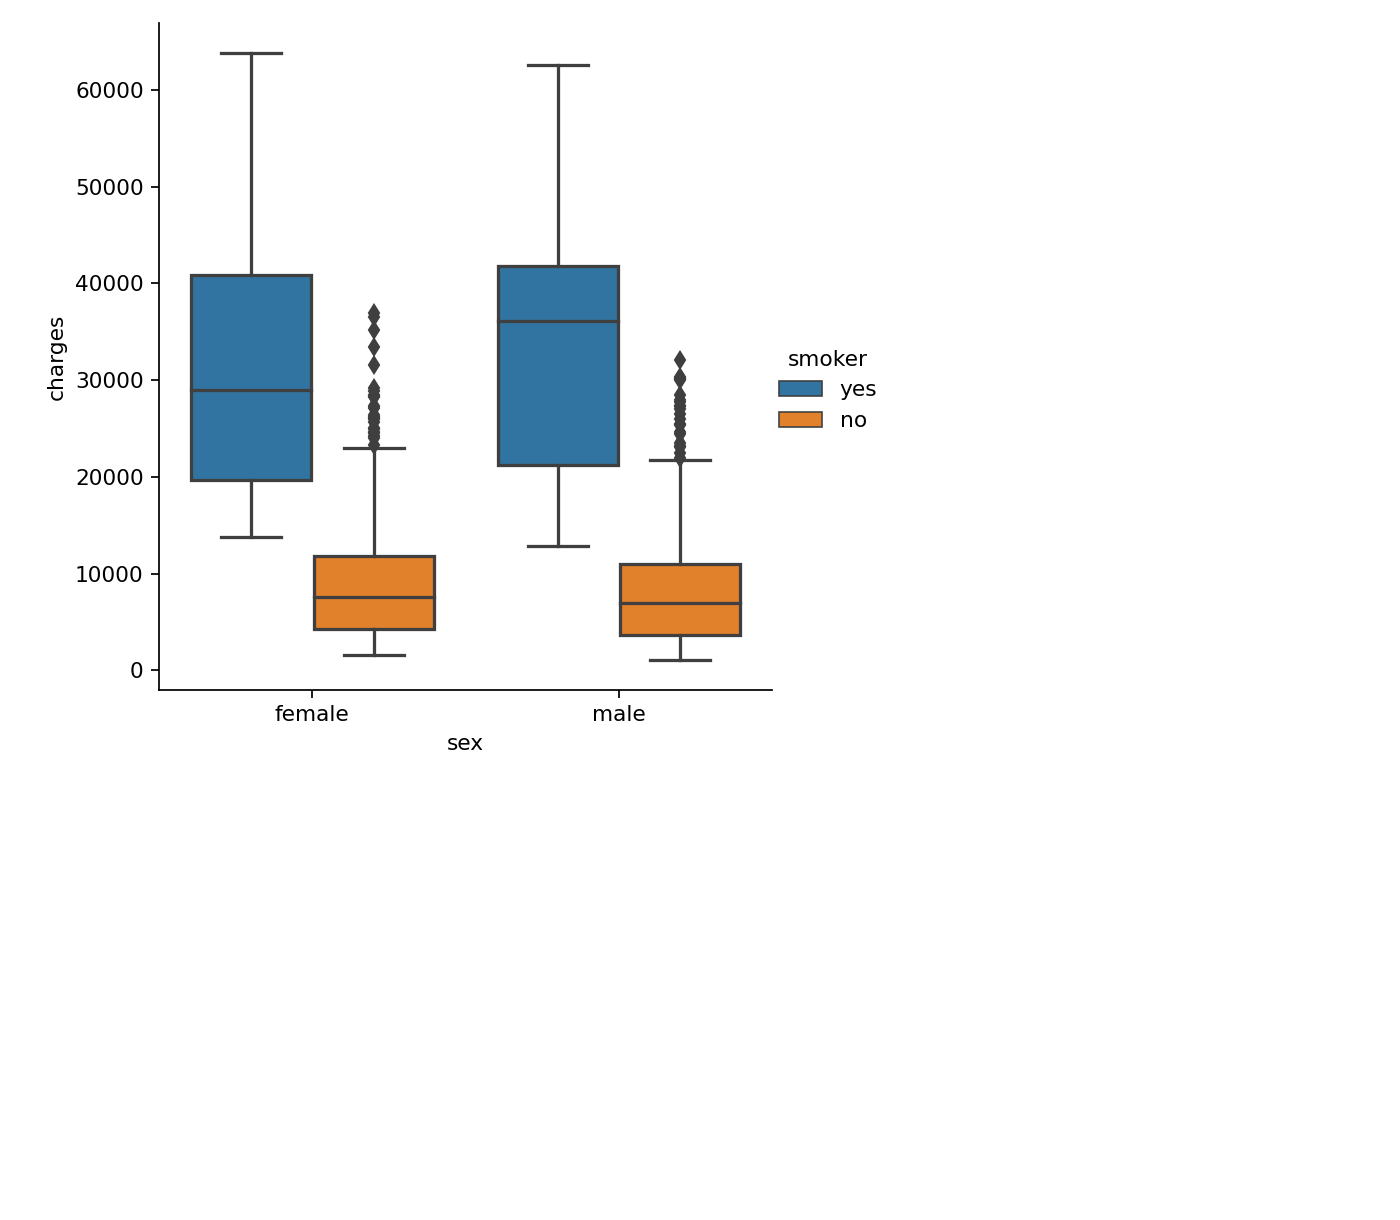

In [5]:
sns.catplot(x='sex', y='charges',kind ='box',hue = 'smoker', data = df)

<IPython.core.display.Javascript object>


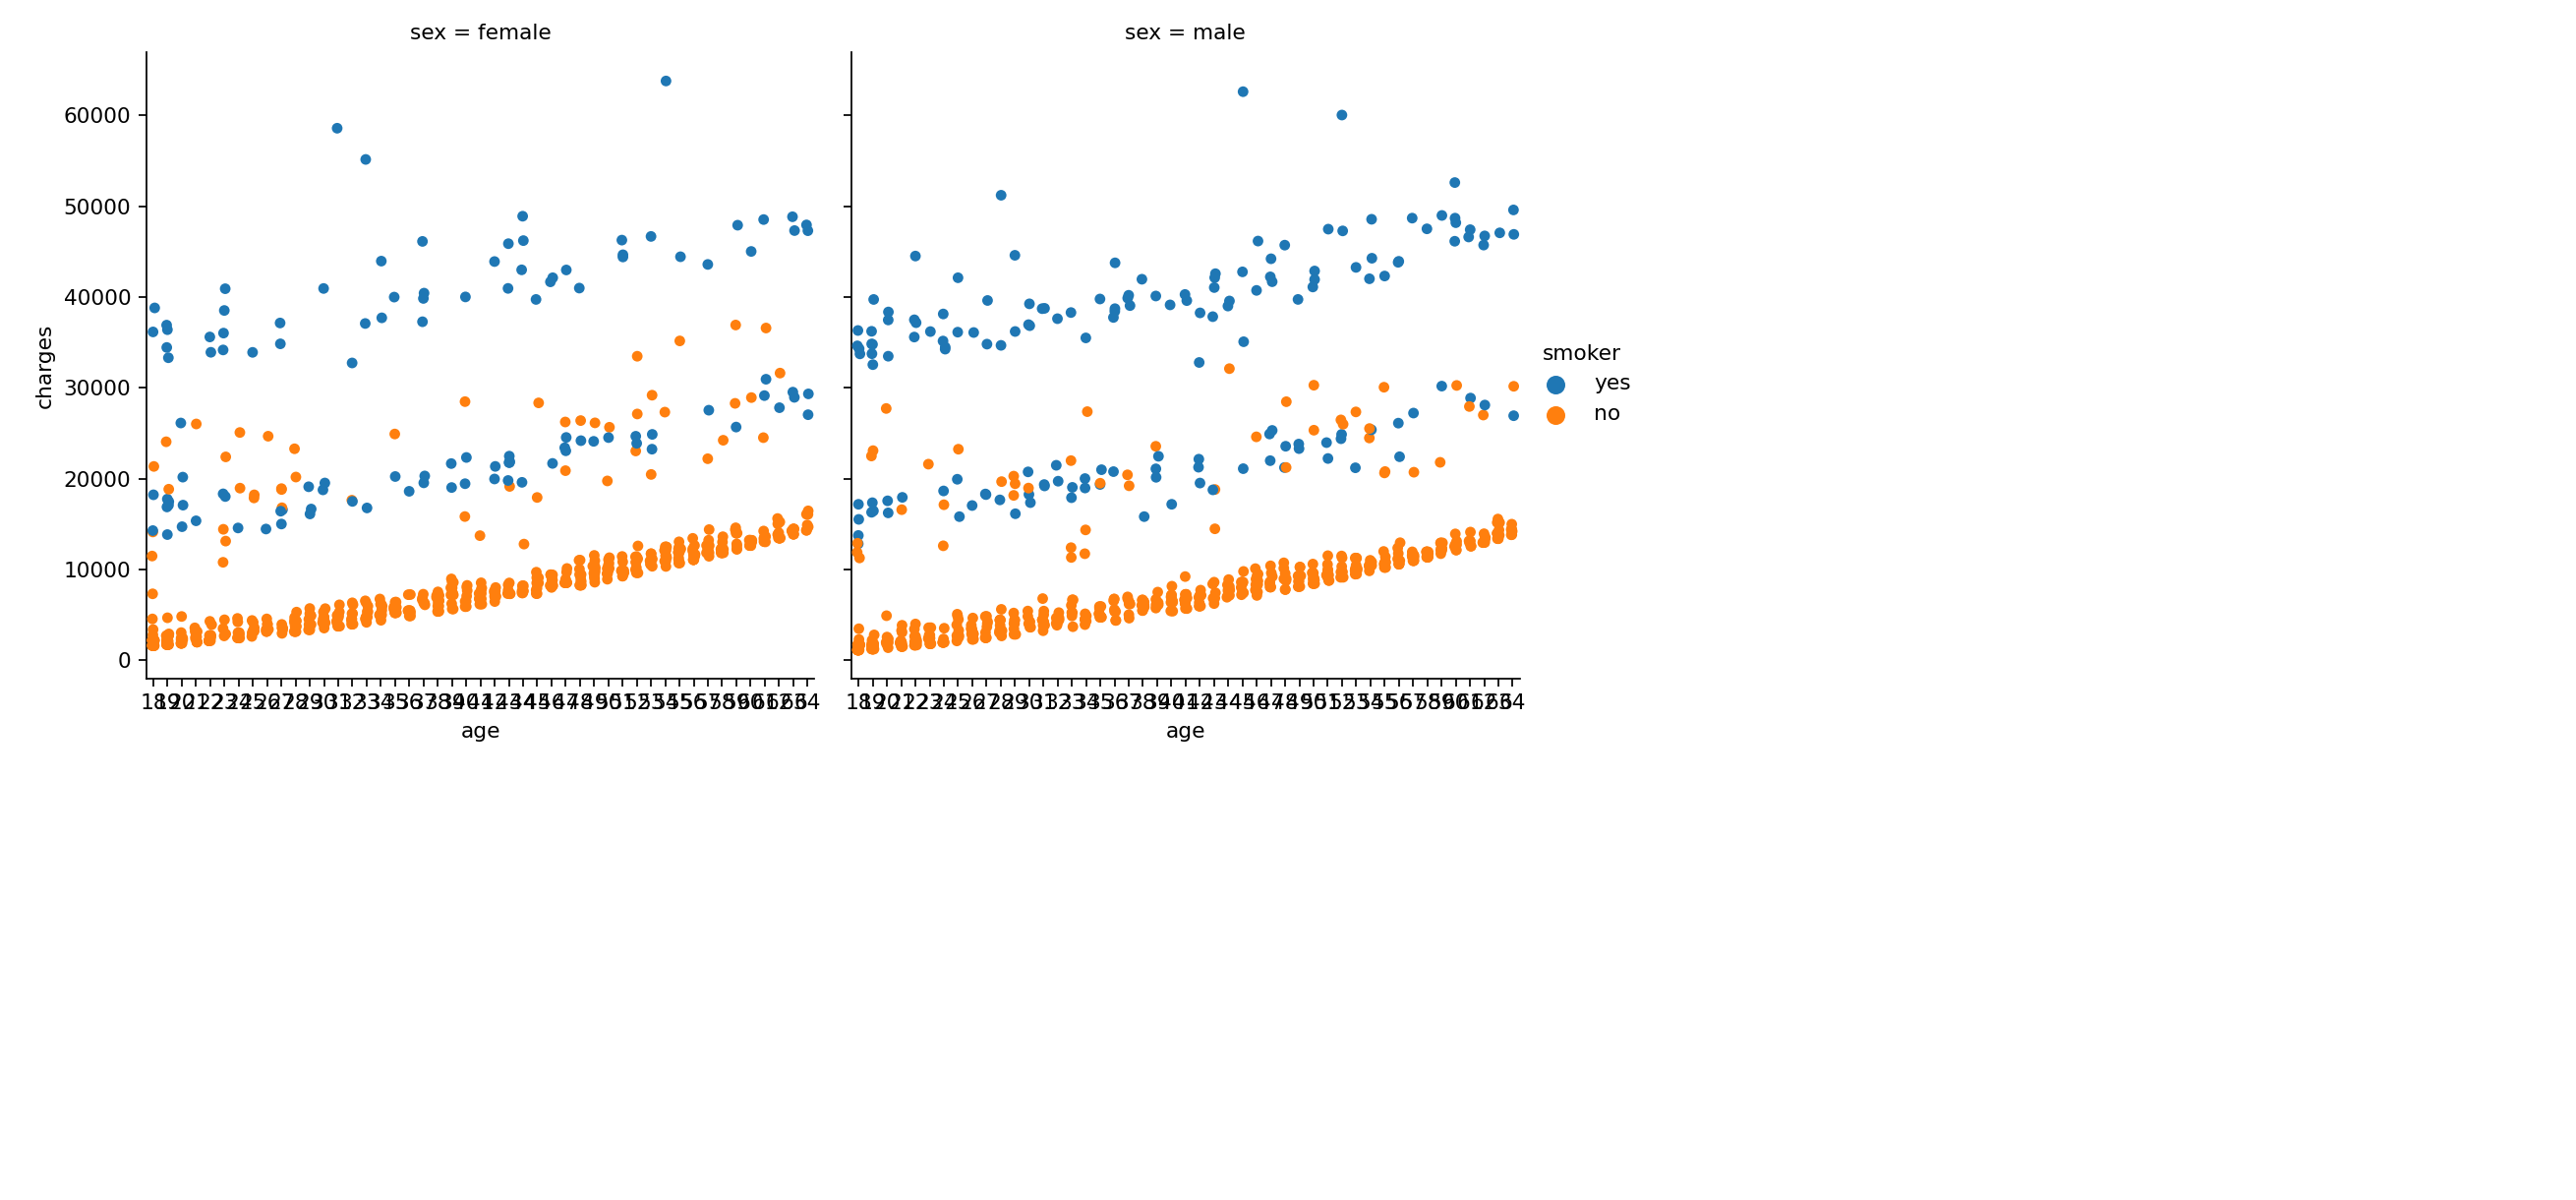

In [6]:
sns.catplot(x='age', y='charges',hue = 'smoker', data = df,col = 'sex')

<IPython.core.display.Javascript object>


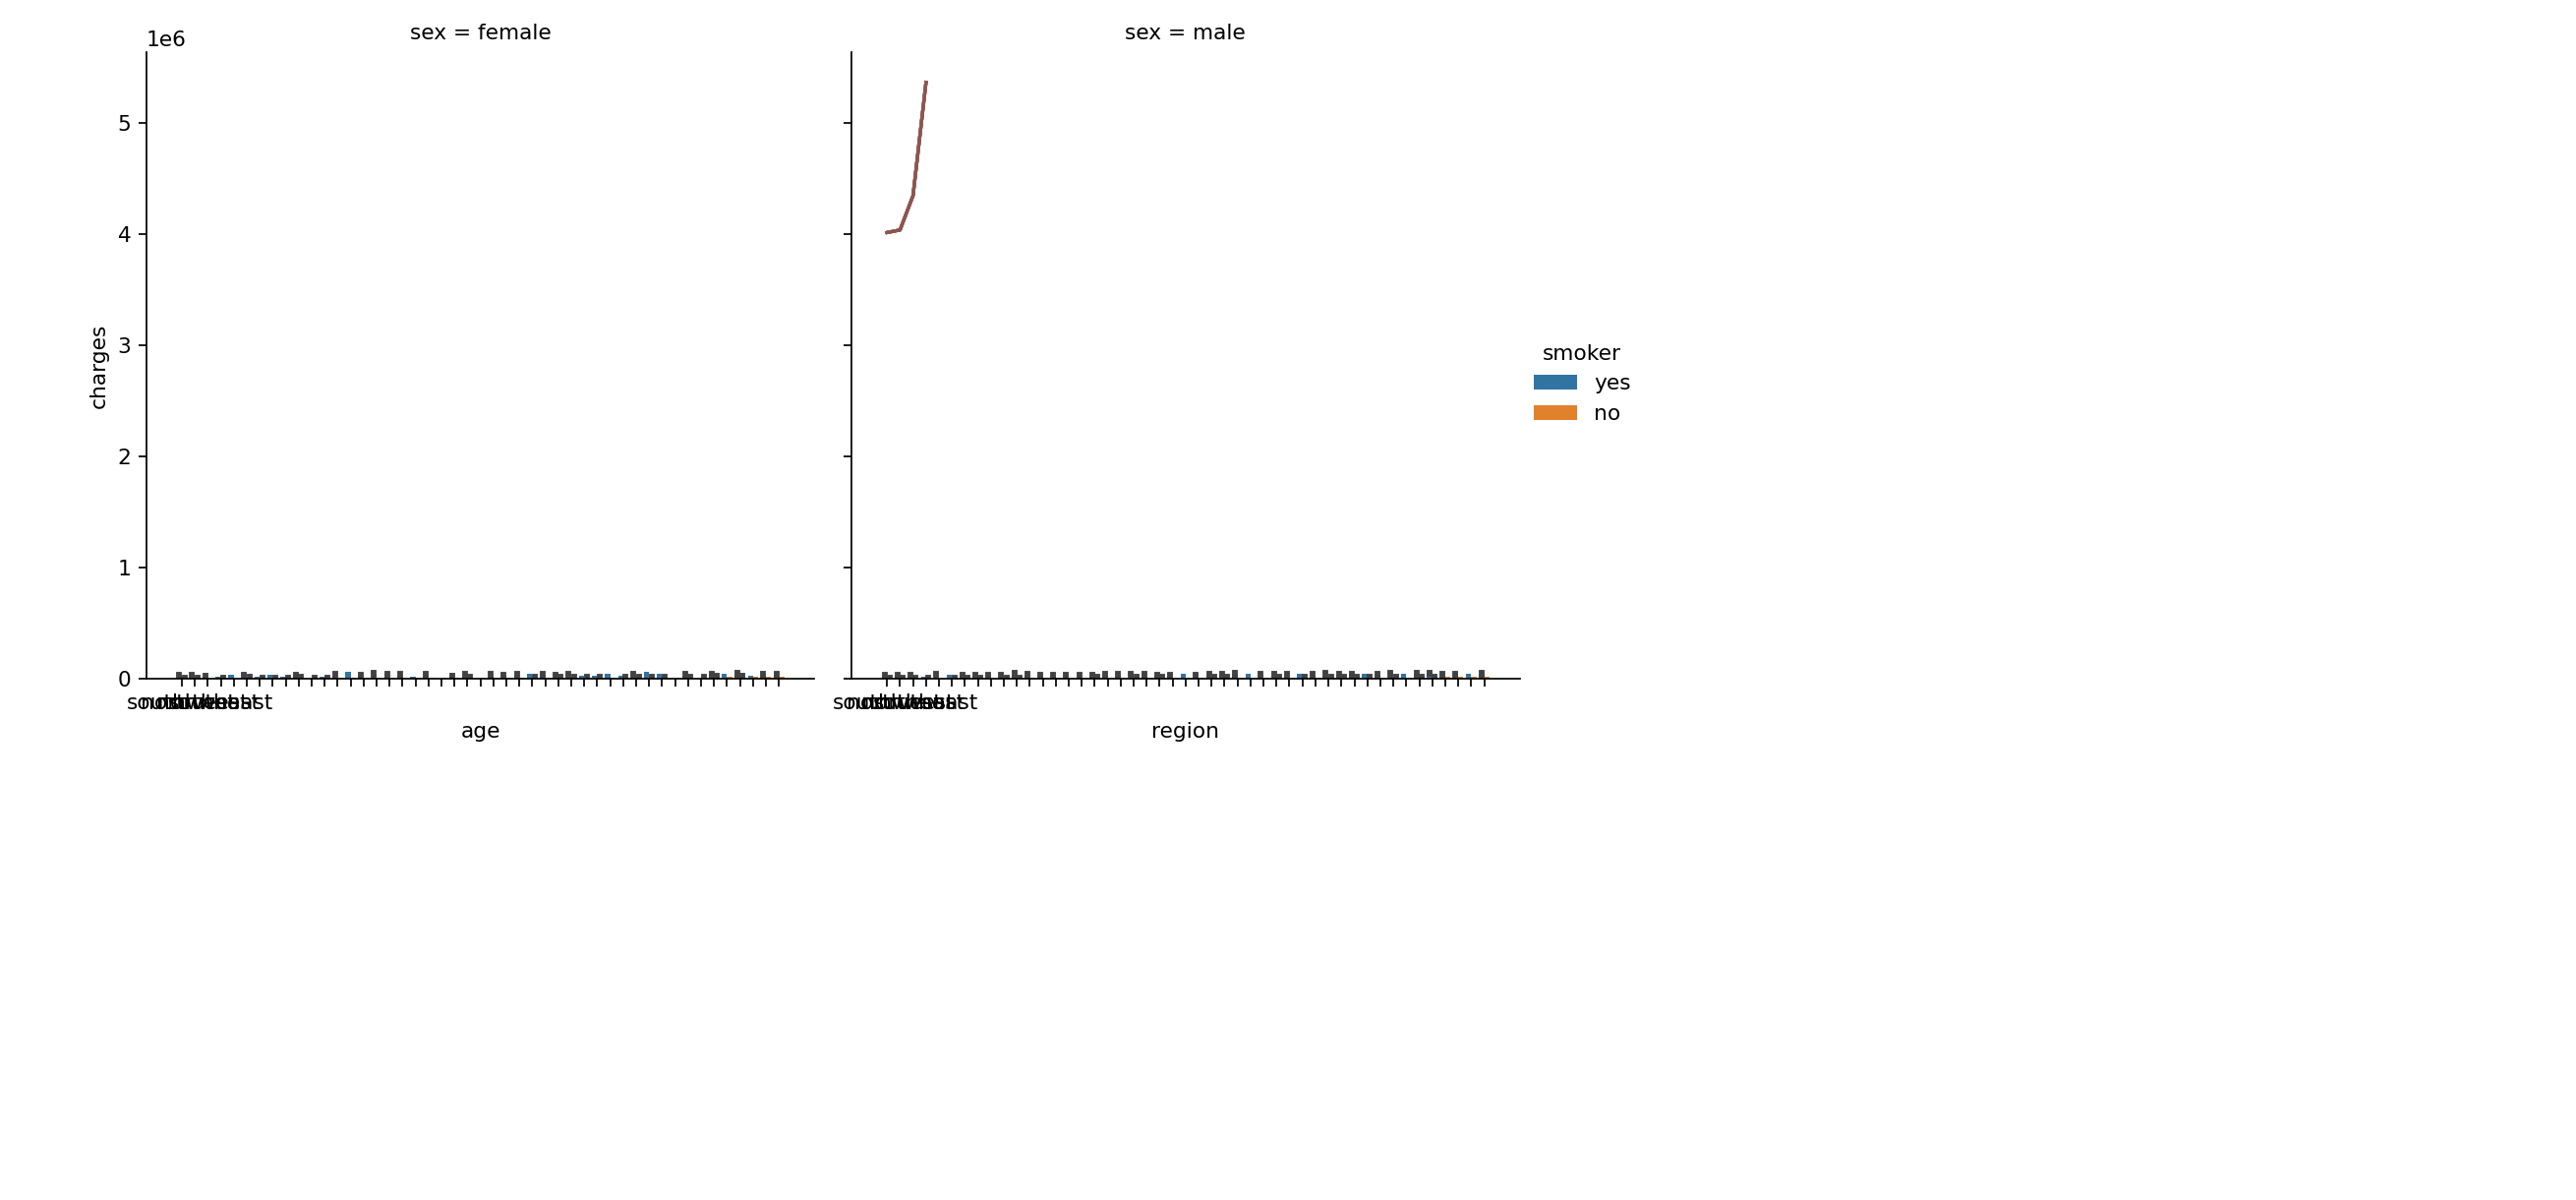

In [8]:
sns.catplot(x='age', y='charges',hue = 'smoker',kind = 'bar', data = df,col = 'sex')

In [7]:
x=df.loc[df['bmi']>30,'bmi']
x

1       33.77
2       33.00
6       33.44
12      34.40
13      39.82
        ...  
1331    33.40
1332    44.70
1333    30.97
1334    31.92
1335    36.85
Name: bmi, Length: 705, dtype: float64

In [8]:
x=df[df.bmi>30].bmi
x

1       33.77
2       33.00
6       33.44
12      34.40
13      39.82
        ...  
1331    33.40
1332    44.70
1333    30.97
1334    31.92
1335    36.85
Name: bmi, Length: 705, dtype: float64

<IPython.core.display.Javascript object>


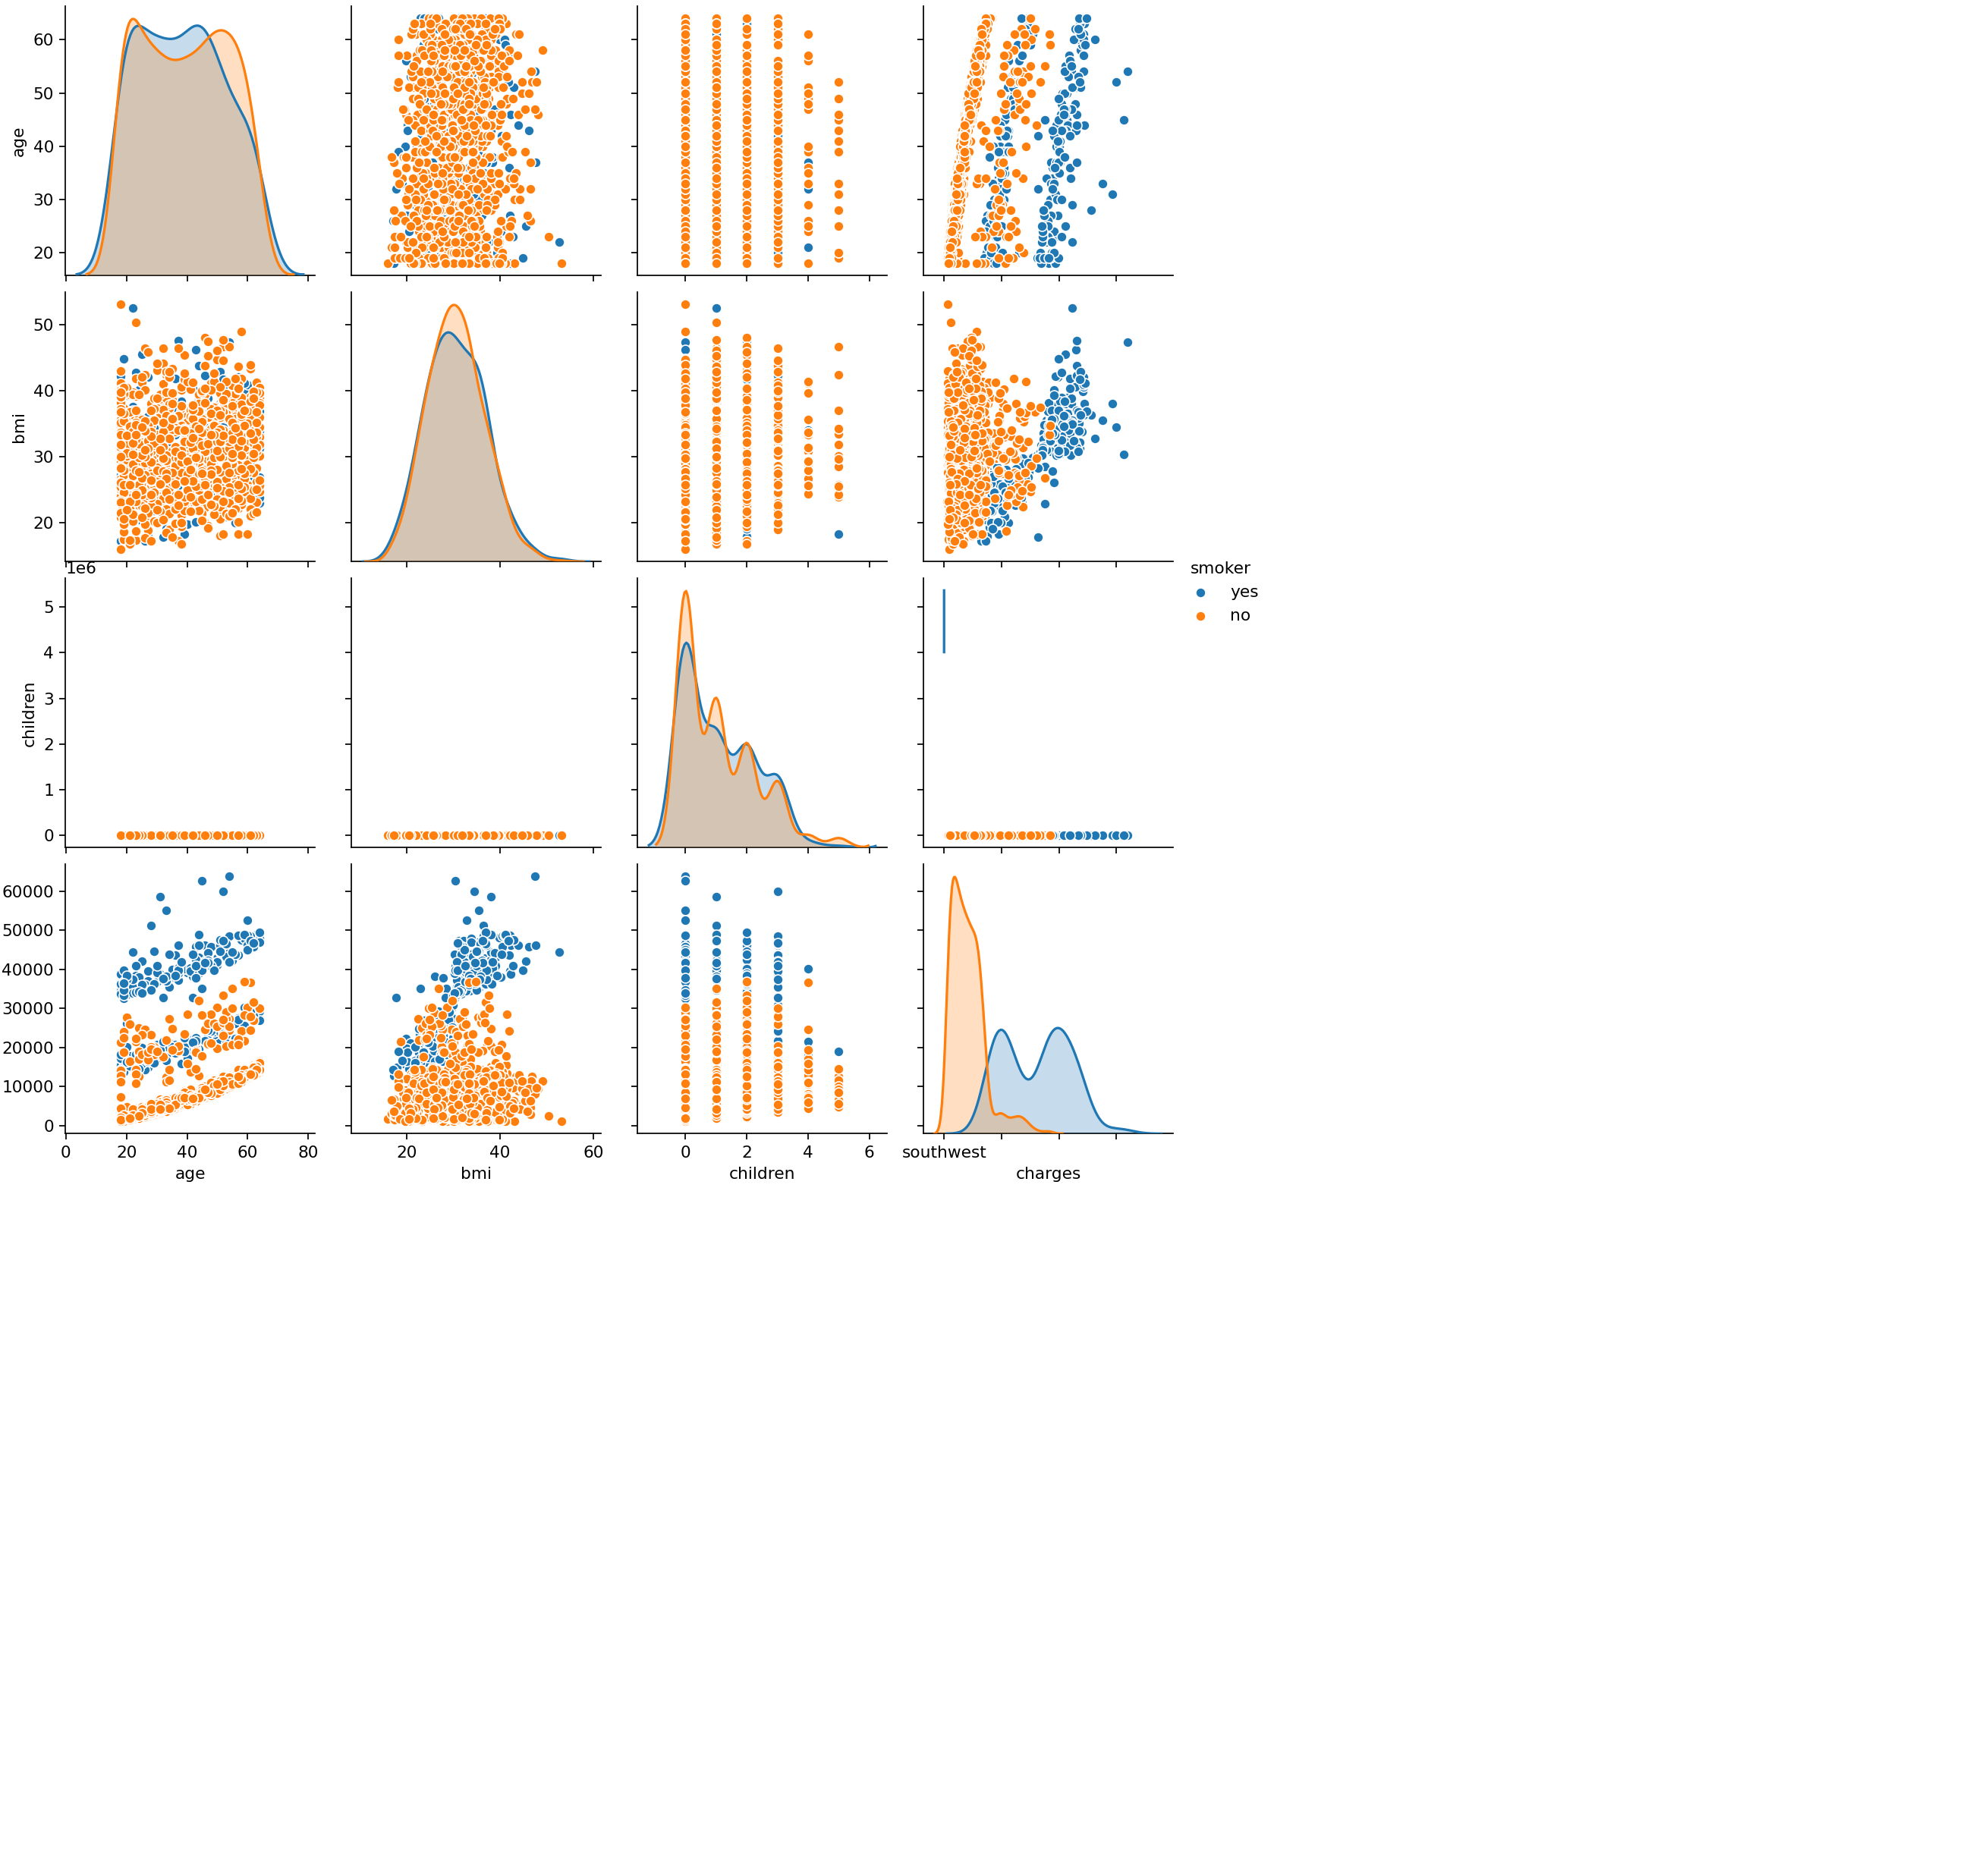

In [11]:
sns.pairplot(data =df, hue = 'smoker')

In [20]:
df['charges'].groupby(df.region).sum().sort_values(ascending = True).plot()


<IPython.core.display.Javascript object>


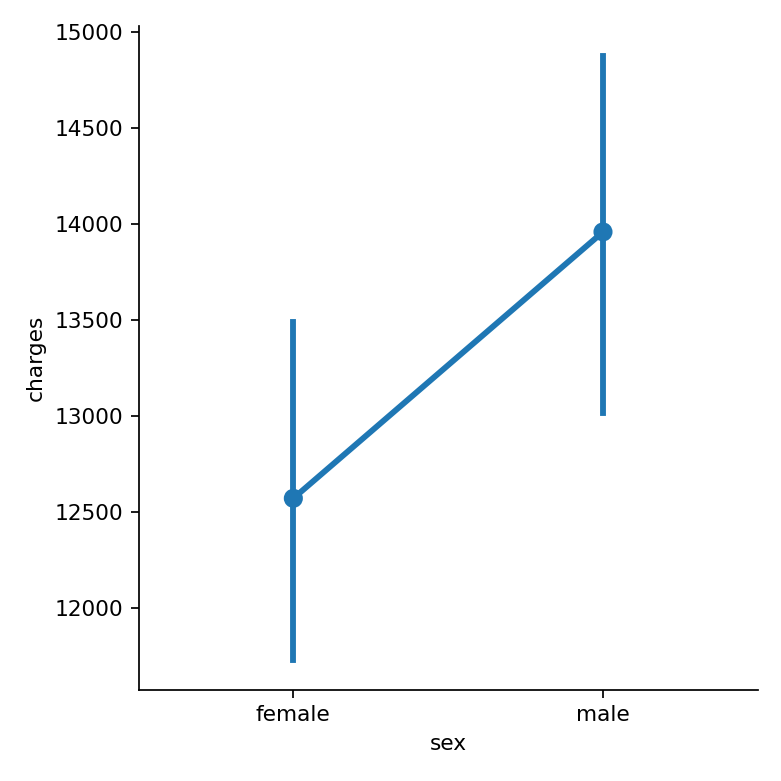

In [21]:
sns.catplot(x='sex', y='charges',kind ='point', data = df)

<IPython.core.display.Javascript object>


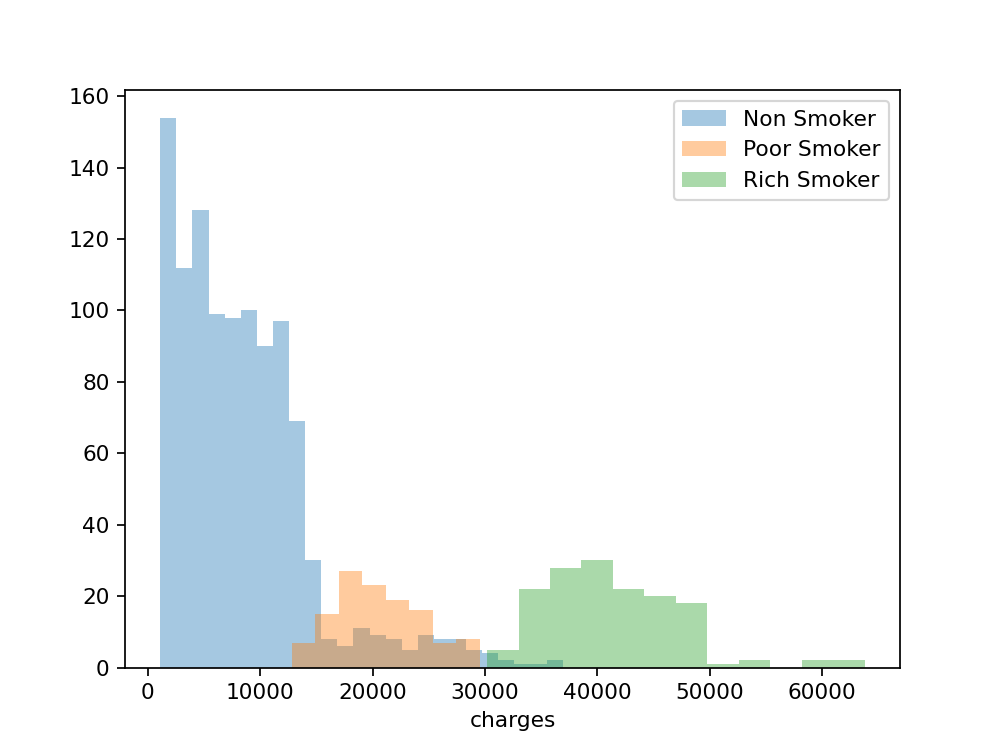

In [22]:
plt.figure()
sns.distplot(df[df.smoker=='no'].charges,label='Non Smoker', kde = False)
sns.distplot(df[(df.smoker=='yes')&(df.charges<30000)].charges,label='Poor Smoker', kde = False)
sns.distplot(df[(df.smoker=='yes')&(df.charges>30000)].charges,label='Rich Smoker', kde = False)

plt.legend()

In [ ]:
df[df.smoker=='no'].charges

In [26]:
df.loc[df['smoker']=='no', 'charges']

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [27]:
df[df.age>=60].groupby('smoker')['children'].value_counts()

smoker  children
no      0           63
        1            9
        3            8
        2            6
        4            1
yes     0           17
        1            4
        2            3
        3            3
Name: children, dtype: int64

<IPython.core.display.Javascript object>


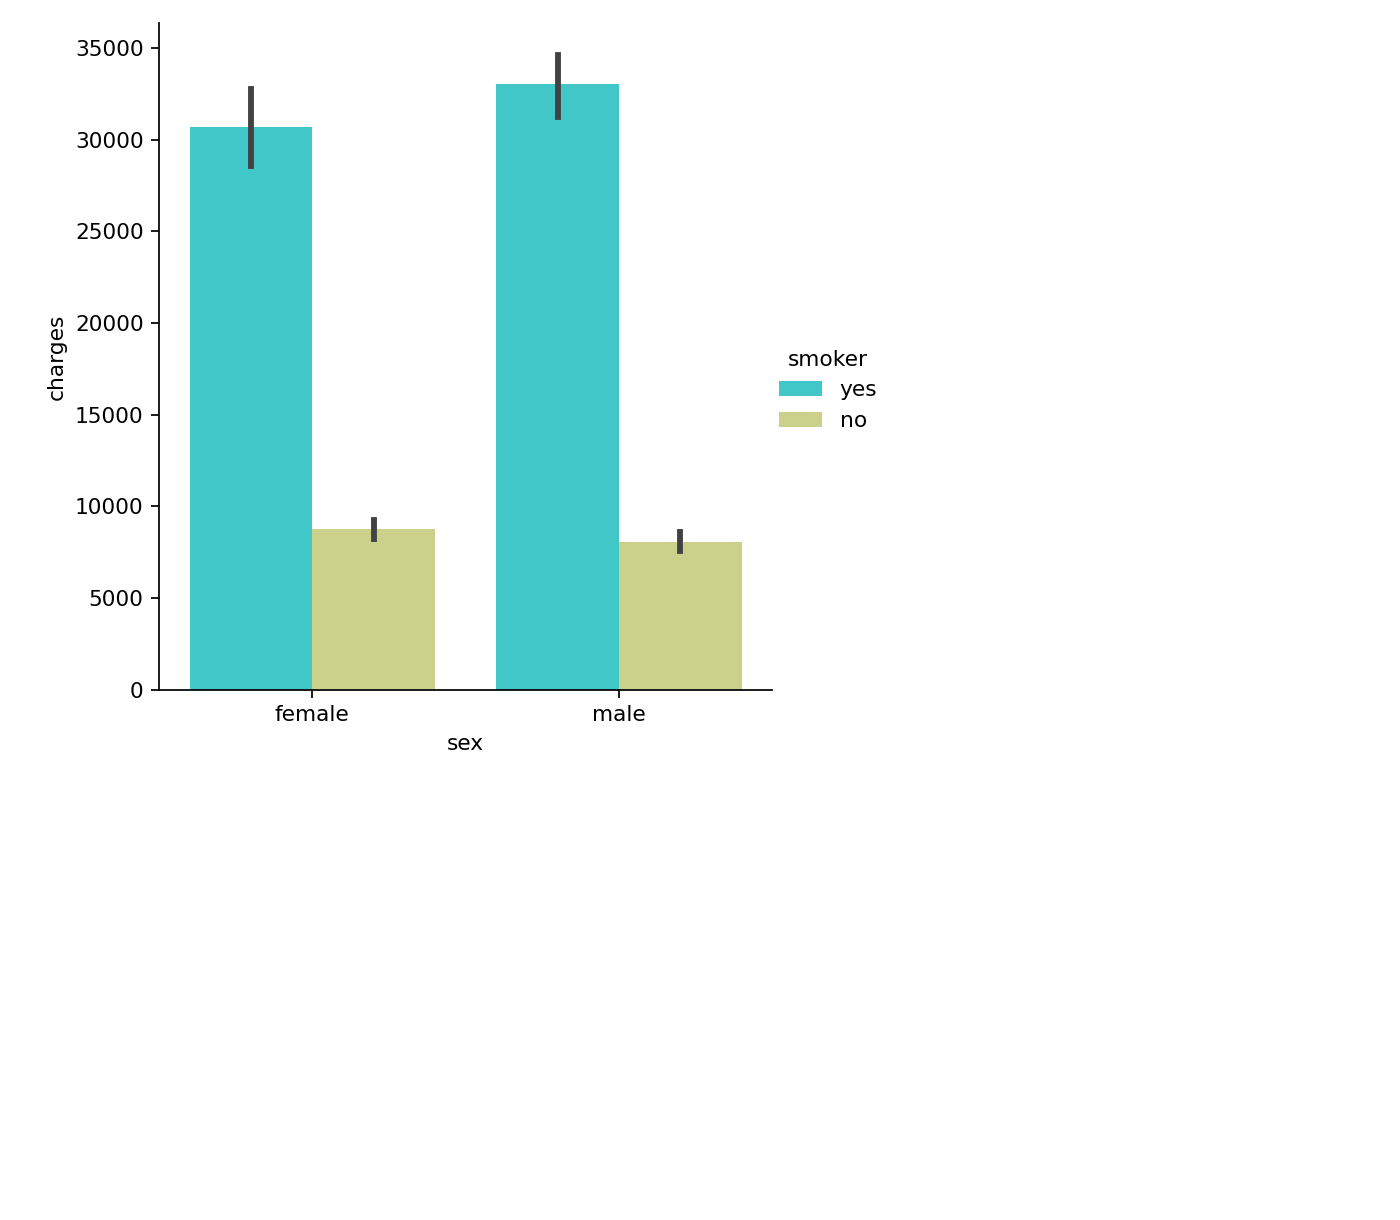

In [28]:
sns.catplot(x="sex",y='charges', kind="bar",hue = 'smoker', palette="rainbow", data=df);

<IPython.core.display.Javascript object>


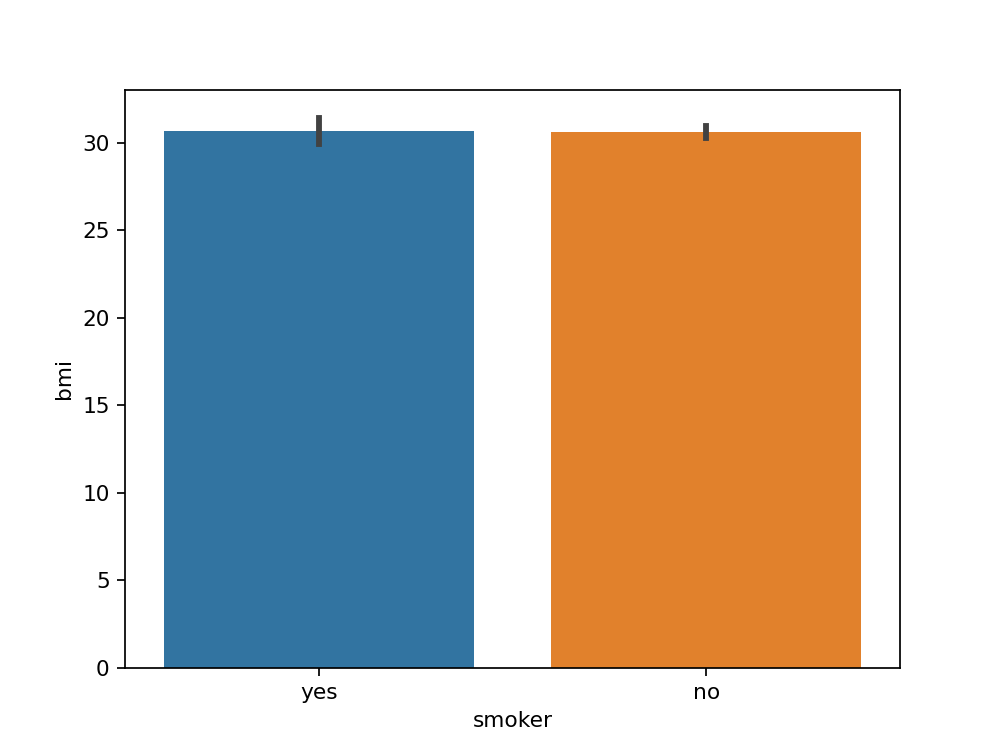

In [29]:
plt.figure()
sns.barplot(df.smoker,df.bmi)

In [30]:
df.groupby('smoker')['sex'].value_counts()

smoker  sex   
no      female    547
        male      517
yes     male      159
        female    115
Name: sex, dtype: int64

In [31]:
print('Avg charge of a female who has BMI less than 30 is :'+str(df[(df.bmi<=30)&(df.sex=='female')]['charges'].mean()))
print('Avg charge of a female who has BMI greater than 30 is :'+str(df[(df.bmi>30)&(df.sex=='female')]['charges'].mean()))

Avg charge of a female who has BMI less than 30 is :10735.544429204265
Avg charge of a female who has BMI greater than 30 is :14370.66653245508


In [32]:
female = df.loc[df.sex=='female'].charges

<IPython.core.display.Javascript object>


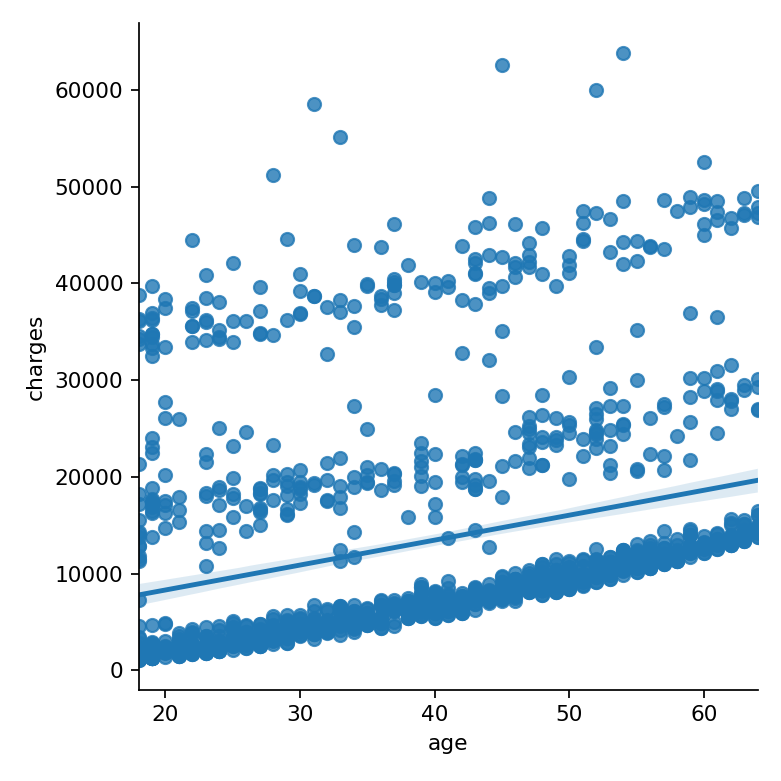

In [33]:
# plt.figure()
sns.lmplot(x= 'age',y='charges', data = df);

# corr

<IPython.core.display.Javascript object>


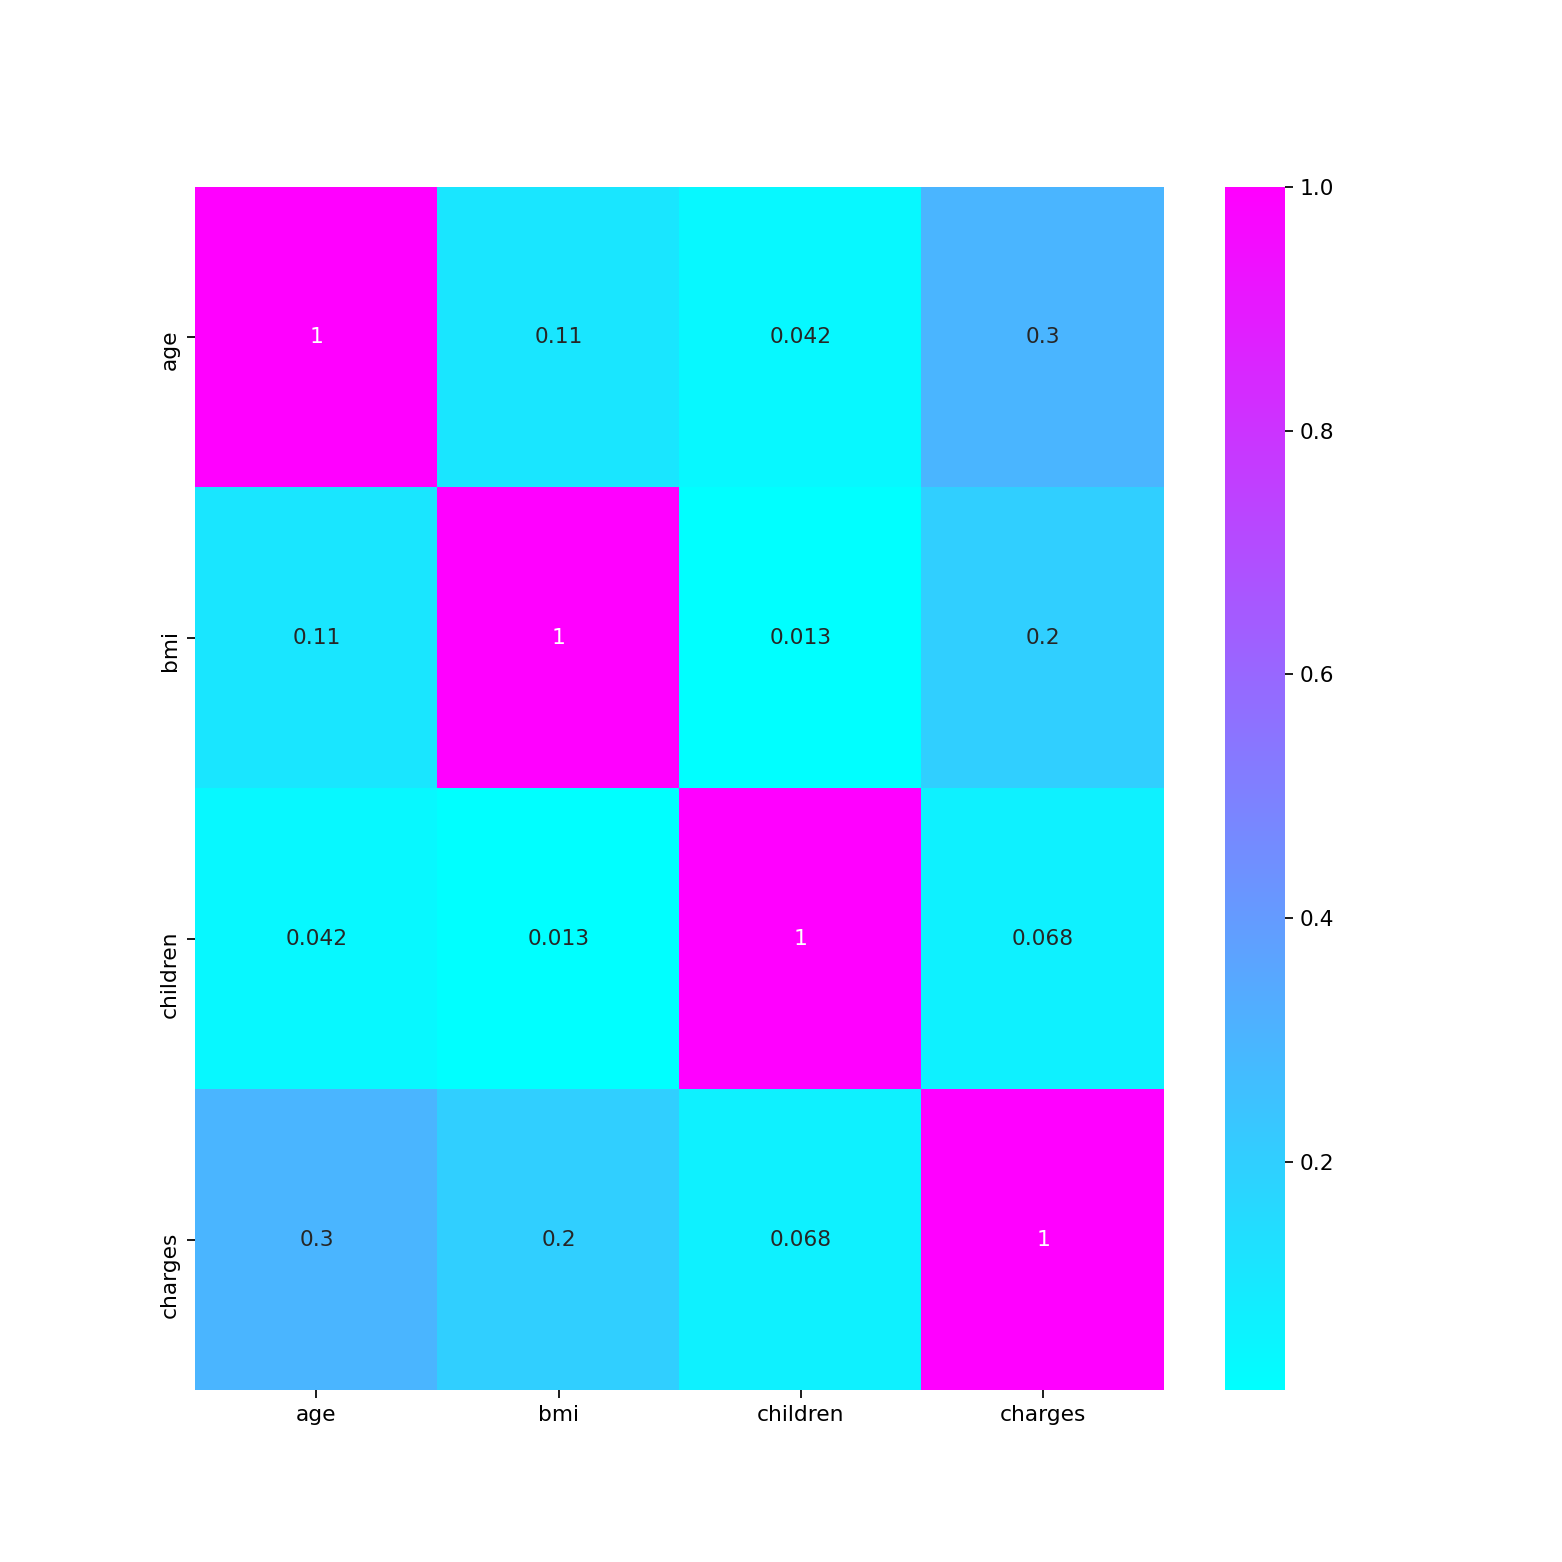

In [34]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [35]:
cr=df.corr

In [36]:
df.corr('kendall')['charges'].sort_values()

bmi         0.082524
children    0.103107
age         0.475302
charges     1.000000
Name: charges, dtype: float64

In [37]:
df=df.drop(['region'],axis=1)

In [38]:
df=pd.get_dummies(df, drop_first=True)

In [39]:
x= df.drop('charges', axis= 1)
y = df.charges

# scale

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
# we must apply the scaling to the test set that we computed for the training set
# x_test_scaled = scaler.transform(x_test)

In [41]:
# X=df[['age','sex','bmi','smoker','children','region']].copy()
# X.sex=X.sex.map(lambda x:1 if x=='male' else 0)
# X.smoker=X.smoker.map(lambda x:1 if x=='yes' else 0)
# X=X.drop(['region'],axis=1)
lr=LinearRegression()
y=df.charges
model =lr.fit(X,y)
y_hat=model.predict(X)
residuals=y-y_hat
# plt.figure()
# plt.scatter(y_hat,residuals)
model.p_values

AttributeError: 'LinearRegression' object has no attribute 'p_values'

In [42]:
list (zip(model.coef_.round(), x.columns))

[(11856.0, 'age'),
 (11982.0, 'bmi'),
 (2372.0, 'children'),
 (-129.0, 'sex_male'),
 (23823.0, 'smoker_yes')]

In [43]:
pd.DataFrame(list (zip(model.coef_.round(), x.columns)), columns = ['coef', 'feature']).sort_values('coef',ascending= False)

,coef,feature
4,23823.0,smoker_yes
1,11982.0,bmi
0,11856.0,age
2,2372.0,children
3,-129.0,sex_male


In [44]:
print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 36676355.79457731
RMSE: 6056.100708754546
MAE: 4178.655987273669
R2 Score: 0.7497225098709179


In [45]:
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()

<IPython.core.display.Javascript object>


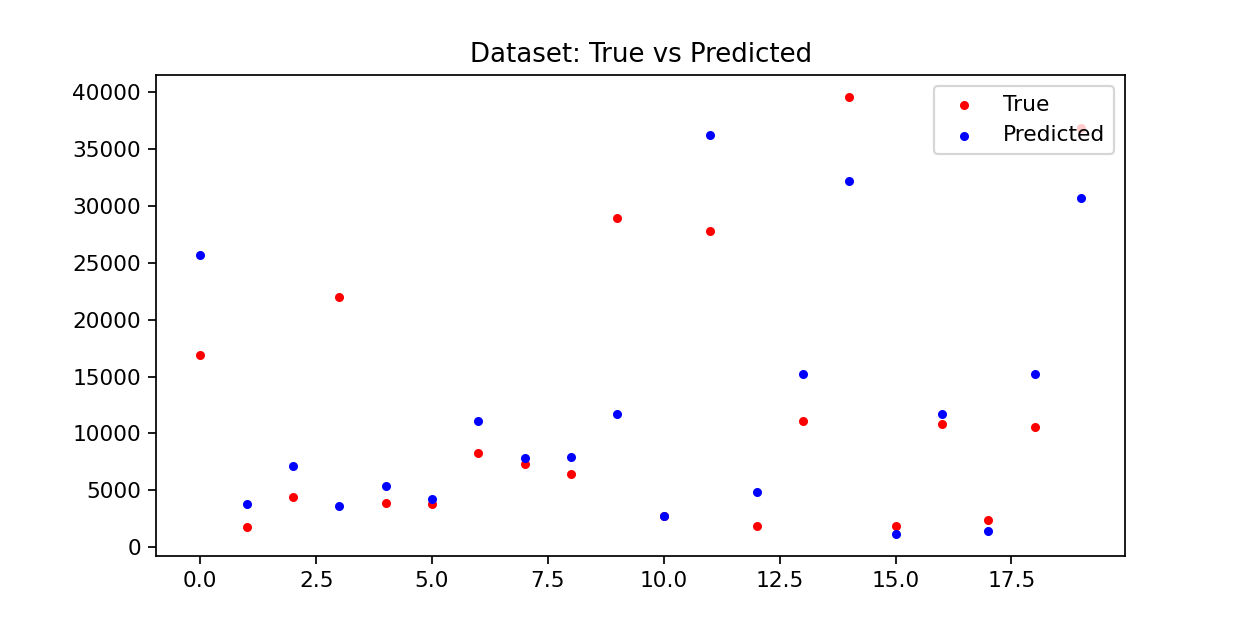

In [46]:
PlotPrediction(y[:20],y_hat[:20])

In [48]:
df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
df=df.drop(['region'],axis=1)

<IPython.core.display.Javascript object>


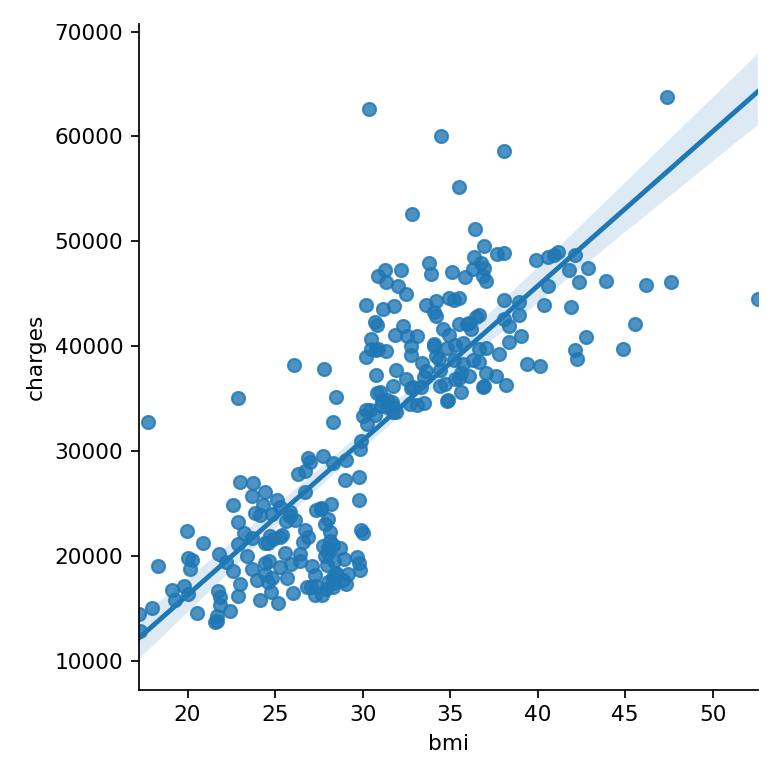

pearsonr: 0.8064806070155406


In [49]:
from scipy.stats import pearsonr
sns.lmplot(data=df[df.smoker=='yes'],x='bmi',y='charges')
print('pearsonr:',pearsonr(df[df.smoker=='yes'].bmi,df[df.smoker=='yes'].charges)[0])

In [50]:
# col_drop = []
# for col in tips_dummy.columns:
#     pearson_coef, p_value = stats.pearsonr(tips_dummy[col], tips_dummy['tip'])
#     print(col, pearson_coef, p_value)
#     if p_value > 0.1:
#         col_drop.append(col)

<IPython.core.display.Javascript object>


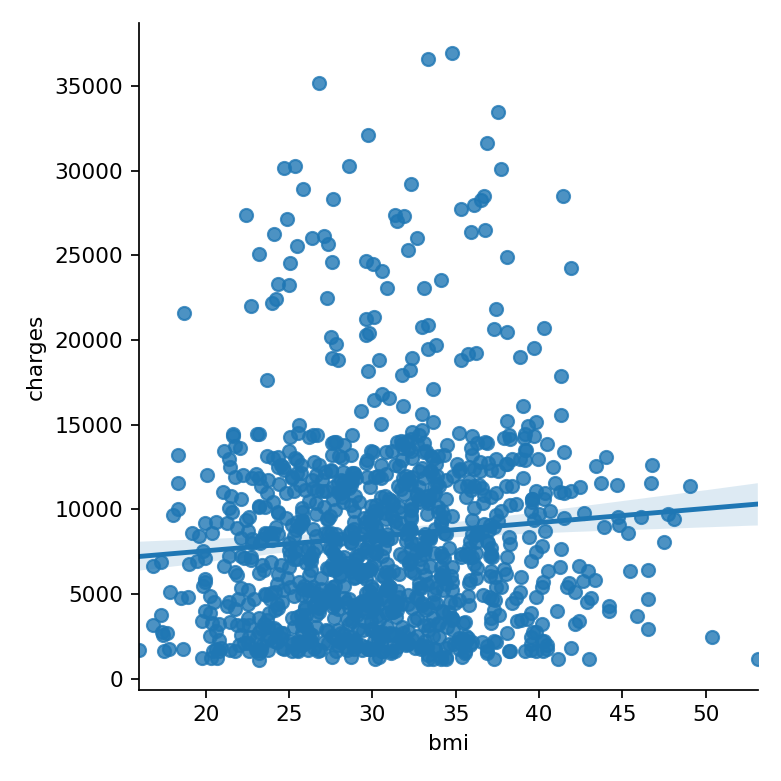

In [43]:
sns.lmplot(data=df[df.smoker=="no"],x="bmi",y="charges")

In [15]:
df["obese"]=df.bmi.map(lambda x:"obese" if x>30 else "fit")


In [16]:
def obese_smoker(obese,smoker):
    if obese=="obese" and smoker=="yes":
        return "fat_smoker"
    elif obese=="fit" and smoker=="yes":
        return "fit_smoker"
    elif obese=="obese" and smoker=='no':
        return "fat"
    else:
        return "fit"  
    
df["fit_fat"]=df[["obese","smoker"]].apply(lambda x: obese_smoker(x["obese"],x["smoker"]),axis=1)
df

,age,sex,bmi,children,smoker,charges,obese,fit_fat
0,19,female,27.900,0,yes,16884.92400,fit,fit_smoker
1,18,male,33.770,1,no,1725.55230,obese,fat
2,28,male,33.000,3,no,4449.46200,obese,fat
3,33,male,22.705,0,no,21984.47061,fit,fit
4,32,male,28.880,0,no,3866.85520,fit,fit
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,obese,fat
1334,18,female,31.920,0,no,2205.98080,obese,fat
1335,18,female,36.850,0,no,1629.83350,obese,fat
1336,21,female,25.800,0,no,2007.94500,fit,fit


In [17]:
df=pd.get_dummies(df, drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,obese_obese,fit_fat_fat_smoker,fit_fat_fit,fit_fat_fit_smoker
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,1,0,0,0
2,28,33.000,3,4449.46200,1,0,1,0,0,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,0


In [18]:
df.corr()['charges']

age                   0.299008
bmi                   0.198341
children              0.067998
charges               1.000000
sex_male              0.057292
smoker_yes            0.787251
obese_obese           0.199683
fit_fat_fat_smoker    0.815375
fit_fat_fit          -0.340032
fit_fat_fit_smoker    0.219471
Name: charges, dtype: float64

In [19]:
# df = df.drop(['children','sex_male','bmi'],axis = 1)

In [20]:
X= df.drop('charges', axis= 1)
y = df.charges
X.skew()

age                   0.055673
bmi                   0.284047
children              0.938380
sex_male             -0.020951
smoker_yes            1.464766
obese_obese          -0.107900
fit_fat_fat_smoker    2.535089
fit_fat_fit           0.512859
fit_fat_fit_smoker    2.723334
dtype: float64

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

In [6]:
lr=LinearRegression()
y=df.charges
lr.fit(X,y)
y_hat=lr.predict(X)
residuals=y-y_hat
# lr.score(X,y)

In [7]:
print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 17792760.537910517
RMSE: 4218.14657615291
MAE: 2244.1391574285253
R2 Score: 0.878650870087286


In [8]:
PlotPrediction(y[:30],y_hat[:30])

NameError: name 'PlotPrediction' is not defined

In [25]:
# df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
# df=df.drop(['region'],axis=1)
# df["obese"]=df.bmi.map(lambda x:"obese" if x>30 else "fit")
# def obese_smoker(obese,smoker):
#     if obese=="obese" and smoker=="yes":
#         return "fat_smoker"
#     elif obese=="fit" and smoker=="yes":
#         return "fit_smoker"
#     elif obese=="obese" and smoker=='no':
#         return "fat"
#     else:
#         return "fit"  
    
# df["fit_fat"]=df[["obese","smoker"]].apply(lambda x: obese_smoker(x["obese"],x["smoker"]),axis=1)
# df=pd.get_dummies(df, drop_first=True)

# X= df.drop('charges', axis= 1)
# y = df.charges

In [4]:
df = pd.read_csv('C:\\Users\\ASUS\\Music\\insurance.csv')
# df=df.drop(['region'],axis=1)
df= df.drop(index= [3, 62, 140, 219, 468, 661, 688, 1008, 1027, 1142, 1328]).reset_index()
def obese_smoker(bmi,smoker):
    if (bmi>=30)& (smoker=="yes"):
        return "fat_smoker"
    else:
        return "normal" 

df["fit_fat"]=df[["bmi","smoker"]].apply(lambda x: obese_smoker(x["bmi"],x["smoker"]),axis=1)

df=pd.get_dummies(df, drop_first=True)

X= df.drop('charges', axis= 1)
y = df.charges
X

,index,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,fit_fat_normal
0,0,19,27.90,0,0,1,0,0,1,1
1,1,18,33.77,1,1,0,0,1,0,1
2,2,28,33.00,3,1,0,0,1,0,1
3,4,32,28.88,0,1,0,1,0,0,1
4,5,31,25.74,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1322,1333,50,30.97,3,1,0,1,0,0,1
1323,1334,18,31.92,0,0,0,0,0,0,1
1324,1335,18,36.85,0,0,0,0,1,0,1
1325,1336,21,25.80,0,0,0,0,0,1,1


In [5]:
print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

NameError: name 'y_hat' is not defined

# lets split it to test train

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13340)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
# we must apply the scaling to the test set that we computed for the training set
x_test_scaled = scaler.transform(x_test)

In [37]:
linreg = LinearRegression().fit(x_train_scaled,y_train)
print(linreg.score(x_train_scaled,y_train))
print('test:',linreg.score(x_test_scaled,y_test))

0.8787132256832756
test: 0.8829530872131711


In [38]:
y_predict=linreg.predict(x_test_scaled)

# plt.scatter(x_test_scaled.reshape(-1,1), y_test,  color='black')
# plt.plot(x_test_scaled, y_predict, color='green', linewidth=2)


<IPython.core.display.Javascript object>


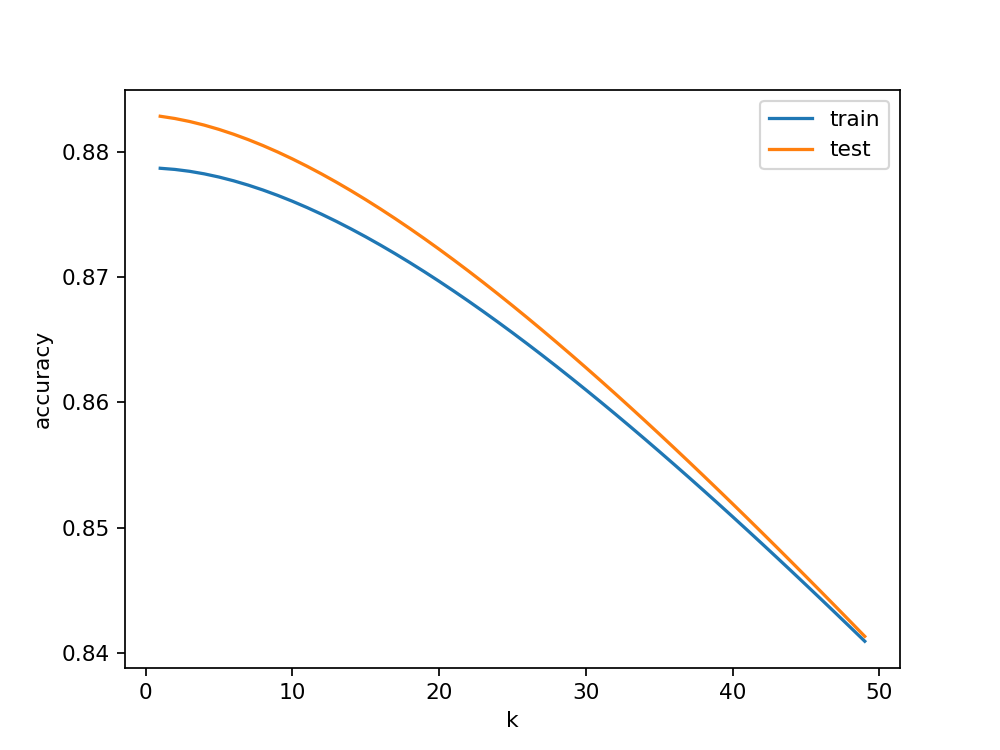

In [39]:
alphas = range(1,50)
scores1 = []
scores2 = []

for k in alphas:
    rg =Ridge(alpha =k)
    rg.fit(x_train_scaled, y_train)
    scores1.append(rg.score(x_train_scaled, y_train))
    scores2.append(rg.score(x_test_scaled, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(alphas, scores1)
plt.plot(alphas, scores2)
plt.legend(['train', 'test'])
# plt.xticks([0.05,.1,4,.8,1,5]);

In [53]:
rg =Ridge(alpha =.05)
rg.fit(x_train_scaled, y_train)

Ridge(alpha=0.05)

In [54]:
RFR = RandomForestRegressor(n_estimators = 1000,max_depth=3)
RFR.fit(x_train_scaled,y_train)

print('train_score:',RFR.score(x_train_scaled,y_train))
print('testt_score:',RFR.score(x_test_scaled,y_test))

train_score: 0.8663839781009424
testt_score: 0.8716000257115185


<IPython.core.display.Javascript object>


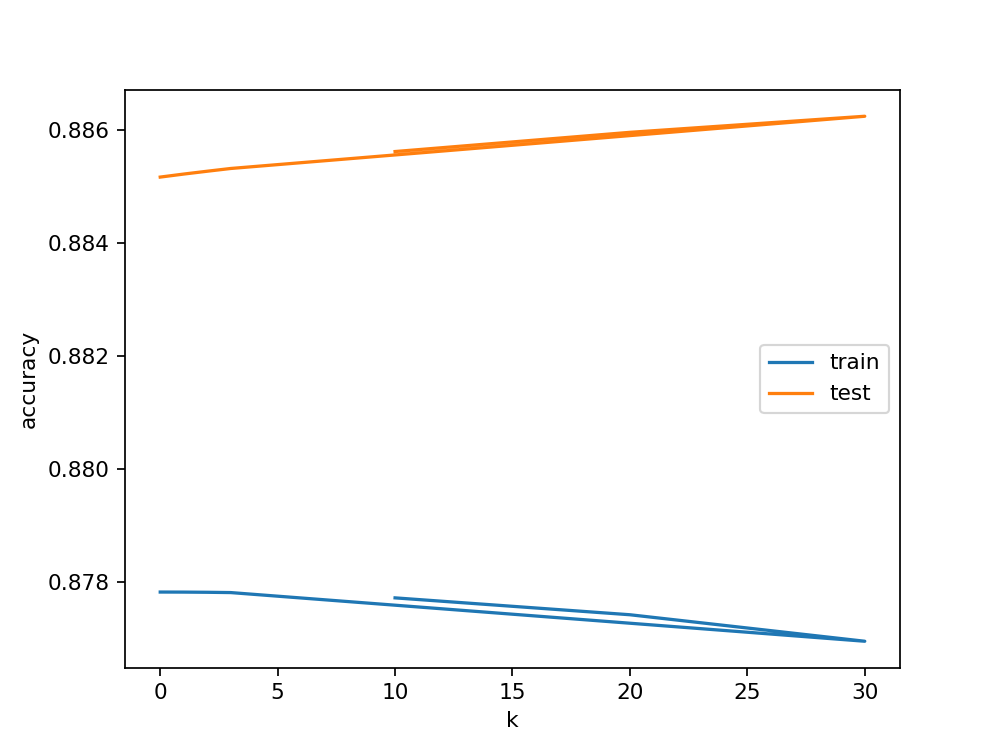

In [55]:
alphas = [10,20,30,3,2,1, 0.1, 0.001, 0.0005]
scores1 = []
scores2 = []
for k in alphas:
    lso =Lasso(alpha =k)
    lso.fit(x_train_scaled, y_train)
    scores1.append(lso.score(x_train_scaled, y_train))
    scores2.append(lso.score(x_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(alphas, scores1)
plt.plot(alphas, scores2)
plt.legend(['train', 'test'])

<IPython.core.display.Javascript object>


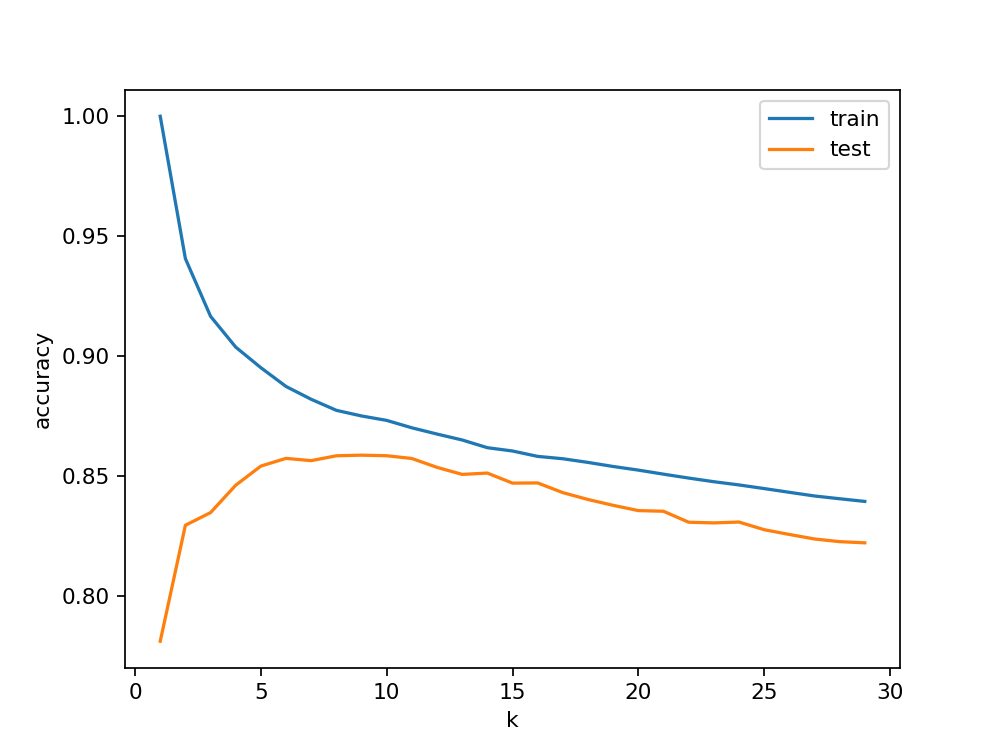

In [56]:
from sklearn.neighbors import KNeighborsRegressor
k_range = range(1,30)
scores1 = []
scores2 = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train_scaled, y_train)
    scores1.append(knn.score(x_train_scaled, y_train))
    scores2.append(knn.score(x_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, scores1)
plt.plot(k_range, scores2)
plt.legend(['train', 'test'])

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)

In [58]:
predicted_train_y = rg.predict(x_train_scaled)
evaluateRegressor(y_train,predicted_train_y," Training Set")   

 Training Set
MSE: 17316321.642194953
MAE: 2193.511236928836
RMSE: 4161.288459383098
LogRMSE: 0.3657221451822309


In [59]:
models = [] 
models.append(('ln', LinearRegression())) 
models.append(('ridge', Ridge(alpha = 1))) 
models.append(('lasso', Lasso(alpha=1.5))) 
models.append(('kn', KNeighborsRegressor(n_neighbors=5))) 
models.append(('rnd', RandomForestRegressor(n_estimators = 1000,max_depth=5)))

# results =[] 
# names = []  
              
# for name, model in models:
    

    
#     kfold = model_selection.StratifiedKFold(n_splits=5, shuffle =True,random_state=2019)
#     cv_results = cross_val_score(model, x_train_scaled, y_train, cv=kfold, scoring='accuracy') 
#     results.append(cv_results) 
#     names.append(name) 
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    

In [60]:
n_folds = 10
results =[] 
names = []  
for name, model in models:
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X1)
    rmse= np.sqrt(-cross_val_score(model, X2, y, scoring="neg_mean_squared_error", cv = kf))
    msg = "%s: %f (%f)" % (name, rmse.mean(), rmse.std())
    print(msg)
    results.append(rmse) 
    names.append(name)
   

ln: 4171.093524 (795.581263)
ridge: 4172.133563 (791.953158)
lasso: 4171.271893 (795.320375)
kn: 4511.956899 (667.166775)
rnd: 4258.636944 (727.462677)


<IPython.core.display.Javascript object>


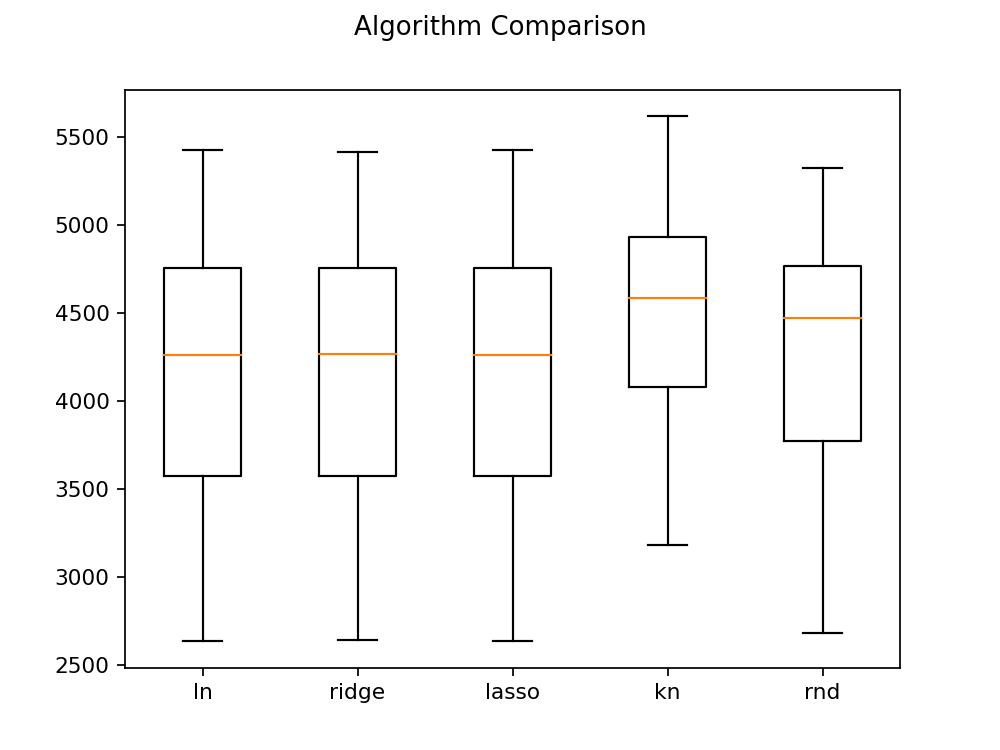

In [61]:
%matplotlib notebook
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [62]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
kfolds=KFold(n_splits=10,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
from sklearn.linear_model import Ridge

model=Ridge()
rid_param_grid = {"alpha":[0.1, 0.3, 1, 3, 5, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
rid_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    2.2s finished


4232.1025549297565

In [63]:
rid_best

Ridge(alpha=0.3)

In [64]:
from sklearn.linear_model import Lasso
model=Lasso()
las_param_grid = {"alpha":[3,2,1.5,1, 0.1, 0.001,.005 ,0.0005,0.000596]}
grid_search= GridSearchCV(model,param_grid=las_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(x_test_scaled,y_test)
las_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.0s finished


4412.14095483621

In [65]:
las_best

Lasso(alpha=3)

In [66]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
kfolds=KFold(n_splits=10,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)


model = KNeighborsRegressor()
rid_param_grid = {"n_neighbors":[1, 3, 5, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X,y)
knn_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.3s finished


11848.761036368012

In [67]:
knn_best

KNeighborsRegressor(n_neighbors=15)

In [40]:
from sklearn.model_selection import GridSearchCV
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
model=GradientBoostingRegressor()
gb_param_grid = {"n_estimators":[200,500,1000,2000],
                 "learning_rate":[1,.1,0.01],
                   "max_depth":[2,3,4,5]}

                   
                   
                   
grid_search= GridSearchCV(model,param_grid=gb_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
gb_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

NameError: name 'RobustScaler' is not defined

In [69]:
gb_best

GradientBoostingRegressor(learning_rate=0.01, max_depth=2, n_estimators=1000)

In [70]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(rid_best, las_best,knn_best,gb_best),
                                meta_regressor=gb_best,n_jobs=-1,
                                use_features_in_secondary=True)
stack_gen.fit(np.array(X1), np.array(y))
y_hat=stack_gen.predict(X1)

In [71]:
np.sqrt(mean_squared_error(y,stack_gen.predict(X1)))

3920.5667880630363

<IPython.core.display.Javascript object>


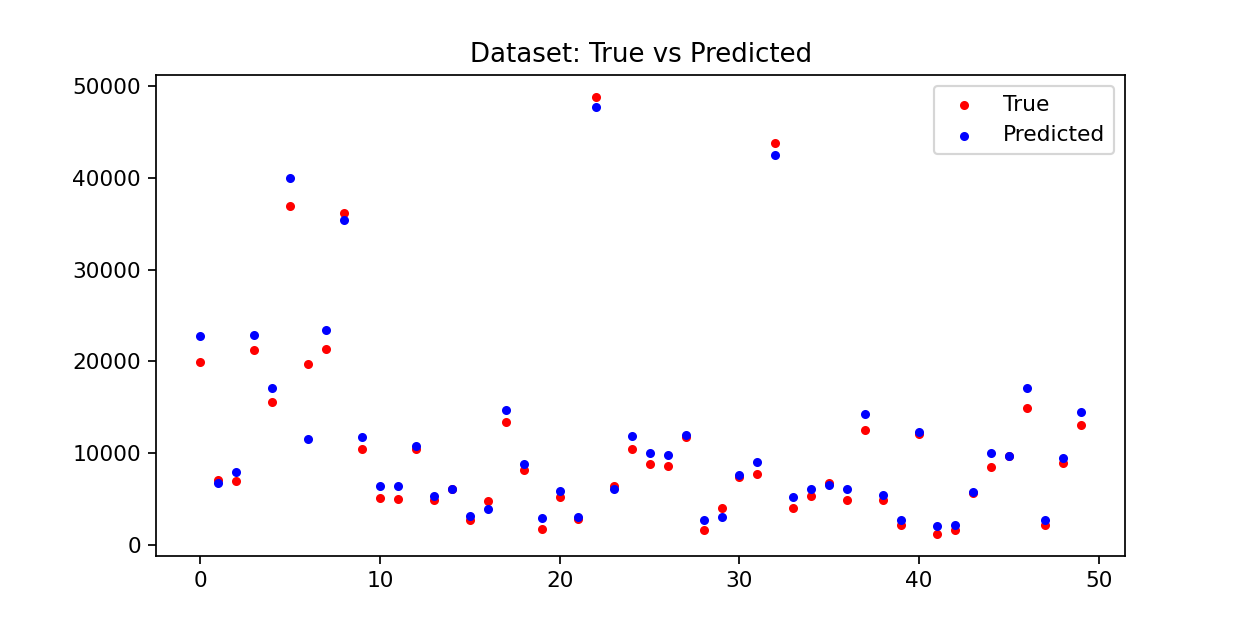

In [72]:
PlotPrediction(y[150:200],y_hat[150:200])

In [74]:
final= pd.DataFrame({'Actual': y, 'Predicted': y_hat})
final

,Actual,Predicted
0,16884.9240,16982.297432
1,1725.5523,2739.228941
2,4449.4620,5594.264623
3,3866.8552,4909.184864
4,3756.6216,5620.874710
...,...,...
1322,10600.5483,12311.056681
1323,2205.9808,3390.419142
1324,1629.8335,3542.859619
1325,2007.9450,2782.522020


In [33]:
def blend_models_predict(X):
    return ((0.1 * las_best.predict(X)) + \
            (0.2 * rid_best.predict(X)) + \
            (0.4 * stack_gen.predict(X)) + \
            (0.1 * lr.predict(X)) + \
            (0.2 * gb_best.predict(X)))

np.sqrt(mean_squared_error(y,blend_models_predict(X1)))

4367.501255699593

In [47]:
def blend_models_predict(X):
    return ((0.1 * las_best.predict(X)) + \
            (0.15 * rid_best.predict(X)) + \
            (0.5 * stack_gen.predict(X)) + \
            (0.25 * knn_best.predict(X)))

np.sqrt(mean_squared_error(y,blend_models_predict(X1)))

5091.639396713809

[19:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439371383.3878555, tolerance: 19607422.156836715
  model = cd_fast.enet_coordinate_descent(


[19:23:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


StackingCVRegressor(meta_regressor=XGBRegressor(base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=0.8, gamma=0,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.01,
                                                max_delta_step=0, max_depth=1,
                                                min_child_weight=2, missing=nan,
                                                monotone_constraints='()',
                                                n_estimators=2000, n_jobs=4,
                                                num_parall...
     

In [91]:
stack_gen.score(X1,y)

0.8728371752530237

In [121]:
predicted_train_y = stack_gen.predict(X1)
evaluateRegressor(y,predicted_train_y," Training Set")  

 Training Set
MSE: 18634792.13355611
MAE: 2402.804661981368
RMSE: 4316.803462465729
LogRMSE: 0.403635059426717


In [ ]:
models = [] 
models.append(('LR', LogisticRegression())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))
models.append(('xgb', XGBClassifier(n_estimators=1000,learning_rate = .01)))

results = [] 
names = []  
for name, model in models:
    
    kfold = StratifiedKFold(n_splits=10, shuffle =True,random_state=2019) #     kfold = KFold(n_splits=5,shuffle = True, random_state=2017) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    

In [ ]:

f,ax = plt.subplots(figsize = (9,4))
ax.set_xticklabels(names) 
ax.boxplot(results)

In [41]:
from sklearn.model_selection import GridSearchCV
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
model=xgb.XGBRegressor()
xgb_param_grid = {"n_estimators":[500,1000,2000],
                 "learning_rate":[1,.1,0.01,.05],
                   "max_depth":[1,2,3,4,5],
                   "subsample":[0.8],
                "colsample_bytree":[0.8],
                 "gamma":[0,1,2],
                "objective":['reg:linear'],
                "min_child_weight":[2], 
                "reg_alpha":[0.1],
                "reg_lambda":[0.5]
                  }
                   
                   
                   
grid_search= GridSearchCV(model,param_grid=xgb_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
xgb_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  6.4min finished


[18:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


4472.585211462291

In [42]:
xgb_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=1,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0.1,
             reg_lambda=0.5, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

In [87]:
from sklearn.preprocessing import PolynomialFeatures
# x = df.drop(['charges', 'sex', 'region'], axis = 1)
# y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
# print(Pol_reg.intercept_)
# print(Pol_reg.coef_)
print(Pol_reg.score(x_train, y_train))

0.8607228099105673


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

In [ ]:
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence

In [10]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
X = df[['age', 'bmi', 'children']]
# df.iloc[:,:-1]
y = df['charges']
X

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [13]:
def viff (dff):
    
    vif = pd.DataFrame()
    vif['fe'] = dff.columns
    vif['score']= [variance_inflation_factor(dff.values, i) for i in range (dff.shape[1])]
    return vif

viff(X)


,fe,score
0,age,7.536550
1,bmi,7.846515
2,children,1.796637
